In [ ]:
import pandas as pd


#upload wearable data.csv file whose path is 1q/CRS data/wearable data.csv

# Load the CSV file into a DataFrame
data = pd.read_csv(1q/CRS data/wearable_data.csv)

# Display the first few rows of the DataFrame to confirm it has been loaded correctly
data


,datetime,patient_id,pulse_rate_avg,covered_skin_temperature_avg,covered_axil_temperature_avg,respiratory_rate_avg,motion_avg,step_count_sum
0,2023-08-08 17:00:00,WEAR_7025,180.520000,30.840000,33.827124,18.033358,1.00,0.000000
1,2023-08-08 17:00:00,WEAR_7025,200.710000,33.950732,33.827124,18.033358,6.13,0.000000
2,2023-08-08 17:00:00,WEAR_7025,73.897598,33.950732,33.827124,18.033358,9.81,0.000000
3,2023-08-08 17:00:00,WEAR_7025,73.897598,33.950732,33.827124,18.033358,9.56,0.000000
4,2023-08-08 17:00:00,WEAR_7025,73.897598,33.950732,33.827124,18.033358,10.00,0.000000
...,...,...,...,...,...,...,...,...
245350,2022-11-23 09:00:00,WEAR_7003,65.880000,35.810000,33.827124,15.930000,2.00,0.000000
245351,2022-11-23 09:00:00,WEAR_7003,65.700000,35.800000,36.220000,18.640000,2.06,0.000000
245352,2022-11-23 09:00:00,WEAR_7003,65.390000,35.770000,33.827124,13.980000,4.44,0.000000
245353,2022-11-23 09:00:00,WEAR_7003,67.010000,35.710000,36.220000,17.790000,1.81,0.000000


**Wearable data :**

We have total 29 patients containing vital signs (pulse rate,temperature,respiratory rate,motion and stepcount average) measured over timepriod(datetime)

In [ ]:
df = data.sort_values(by='patient_id', ascending=True)

df


,datetime,patient_id,pulse_rate_avg,covered_skin_temperature_avg,covered_axil_temperature_avg,respiratory_rate_avg,motion_avg,step_count_sum
11449,2022-10-25 04:00:00,WEAR_7001,76.920000,35.10,33.827124,14.56,1.88,0.0
13878,2022-10-26 21:00:00,WEAR_7001,66.210000,33.92,33.827124,17.38,3.75,0.0
13877,2022-10-26 21:00:00,WEAR_7001,66.840000,33.91,33.827124,15.91,4.06,0.0
13876,2022-10-26 21:00:00,WEAR_7001,67.590000,33.92,24.410000,16.61,2.81,0.0
13875,2022-10-26 21:00:00,WEAR_7001,66.030000,33.93,33.827124,16.26,2.50,0.0
...,...,...,...,...,...,...,...,...
154395,2023-10-14 12:00:00,WEAR_7029,62.860000,35.55,33.827124,15.17,1.00,0.0
154396,2023-10-14 12:00:00,WEAR_7029,62.440000,35.55,24.090000,14.55,1.00,0.0
154397,2023-10-14 12:00:00,WEAR_7029,63.990000,35.56,33.827124,13.85,1.00,0.0
154388,2023-10-14 12:00:00,WEAR_7029,65.720000,35.46,23.970000,39.06,1.00,0.0


In [ ]:
df.columns

Index(['datetime', 'patient_id', 'pulse_rate_avg',
       'covered_skin_temperature_avg', 'covered_axil_temperature_avg',
       'respiratory_rate_avg', 'motion_avg', 'step_count_sum'],
      dtype='object')

**By making a new column as 'temp' containing both skin temperature and axil temperature values and it's stats values.**

In [ ]:
# Select temperature-related columns
temperature_columns = ['covered_skin_temperature_avg', 'covered_axil_temperature_avg']

# Describe temperature-related columns
temperature_stats = df[temperature_columns].describe()

print("Temperature Range Values:")
print(temperature_stats)


Temperature Range Values:
       covered_skin_temperature_avg  covered_axil_temperature_avg
count                 245355.000000                 245355.000000
mean                      33.950732                     33.827124
std                        3.180209                      2.414158
min                       -7.810000                      0.000000
25%                       33.710000                     33.827124
50%                       34.120000                     33.827124
75%                       35.390000                     33.827124
max                       39.540000                     41.280000


**Calculation median baseline temperature of all patients**

In [ ]:
# Select temperature-related columns
temp_columns = ['covered_skin_temperature_avg', 'covered_axil_temperature_avg']

# Calculate the median baseline temperature
median_baseline_temp = df[temp_columns].median().mean()  # Calculate the median of each column and then take the mean

print("Median Baseline Temperature:", median_baseline_temp)


Median Baseline Temperature: 33.97356216957036


**Calculating Individual Threshold value - Ti = 2 standard deviations above their baseline temperature**

In [ ]:
# Calculate baseline temperature for each patient
baseline_temp = df[temp_columns].mean(axis=1)  # Assuming 'temp_columns' contains temperature-related columns

# Calculate standard deviation of baseline temperature
std_baseline_temp = df[temp_columns].std(axis=1)

# Calculate individualized threshold (Ti) for each patient
individual_threshold = baseline_temp + 2 * std_baseline_temp

print("Individualized Threshold (Ti):")
print(individual_threshold)


Individualized Threshold (Ti):
11449     36.263680
13878     34.004908
13877     33.985766
13876     42.614171
13875     34.024050
            ...    
154395    37.125076
154396    46.026887
154397    37.144218
154388    45.964314
154804    35.919122
Length: 245355, dtype: float64


In [ ]:
# Calculate mean temperature from temperature-related columns
df['temp'] = df[temp_columns].mean(axis=1)

# Display the updated DataFrame
print(df)


                   datetime patient_id  pulse_rate_avg  \
11449   2022-10-25 04:00:00  WEAR_7001       76.920000   
13878   2022-10-26 21:00:00  WEAR_7001       66.210000   
13877   2022-10-26 21:00:00  WEAR_7001       66.840000   
13876   2022-10-26 21:00:00  WEAR_7001       67.590000   
13875   2022-10-26 21:00:00  WEAR_7001       66.030000   
...                     ...        ...             ...   
154395  2023-10-14 12:00:00  WEAR_7029       62.860000   
154396  2023-10-14 12:00:00  WEAR_7029       62.440000   
154397  2023-10-14 12:00:00  WEAR_7029       63.990000   
154388  2023-10-14 12:00:00  WEAR_7029       65.720000   
154804  2023-10-14 19:00:00  WEAR_7029       73.897598   

        covered_skin_temperature_avg  covered_axil_temperature_avg  \
11449                          35.10                     33.827124   
13878                          33.92                     33.827124   
13877                          33.91                     33.827124   
13876                  

**Making a new dataframe as "data' which contains patient id and Temperature values over timeperiod('datetime')**

In [ ]:
# Create a new DataFrame with selected columns
data = df.loc[:, ['patient_id', 'datetime', 'temp']]

# Display the new DataFrame
data


,patient_id,datetime,temp
11449,WEAR_7001,2022-10-25 04:00:00,34.463562
13878,WEAR_7001,2022-10-26 21:00:00,33.873562
13877,WEAR_7001,2022-10-26 21:00:00,33.868562
13876,WEAR_7001,2022-10-26 21:00:00,29.165000
13875,WEAR_7001,2022-10-26 21:00:00,33.878562
...,...,...,...
154395,WEAR_7029,2023-10-14 12:00:00,34.688562
154396,WEAR_7029,2023-10-14 12:00:00,29.820000
154397,WEAR_7029,2023-10-14 12:00:00,34.693562
154388,WEAR_7029,2023-10-14 12:00:00,29.715000


**Calculating 'Ti' for each patient**

In [ ]:
# Calculate mean temperature for each patient
mean_temp_per_patient = df.groupby('patient_id')['temp'].mean()

# Calculate standard deviation for each patient
std_temp_per_patient = df.groupby('patient_id')['temp'].std()

# Calculate Ti for each patient by adding two standard deviations to the mean temperature
Ti_per_patient = mean_temp_per_patient + 2 * std_temp_per_patient

# Display Ti for each patient
print(Ti_per_patient)


patient_id
WEAR_7001    38.093474
WEAR_7002    36.390007
WEAR_7003    37.293549
WEAR_7004    38.391355
WEAR_7005    36.619762
WEAR_7006    38.350740
WEAR_7007    38.110755
WEAR_7008    37.445124
WEAR_7009    39.067711
WEAR_7010    37.198716
WEAR_7011    38.494521
WEAR_7012    35.524669
WEAR_7013    38.731114
WEAR_7014    39.947943
WEAR_7015    38.395320
WEAR_7016    35.781171
WEAR_7017    36.155887
WEAR_7018    38.074753
WEAR_7019    37.413814
WEAR_7020    36.653275
WEAR_7021    36.839902
WEAR_7022    38.133473
WEAR_7023    38.069246
WEAR_7024    37.152145
WEAR_7025    37.080291
WEAR_7026    34.613331
WEAR_7027    36.590477
WEAR_7028    35.354942
WEAR_7029    36.771814
Name: temp, dtype: float64


**Calculating 'Median individualized temperature threshold (Ti)' by calculating median of Ti of all patients**

In [ ]:
# Calculate mean temperature for each patient
mean_temp_per_patient = df.groupby('patient_id')['temp'].mean()

# Calculate standard deviation for each patient
std_temp_per_patient = df.groupby('patient_id')['temp'].std()

# Calculate Ti for each patient by adding two standard deviations to the mean temperature
Ti_per_patient = mean_temp_per_patient + 2 * std_temp_per_patient

# Calculate median Ti across all patients
median_Ti = Ti_per_patient.median()

# Display median Ti
print("Median individualized temperature threshold (Ti):", median_Ti)


Median individualized temperature threshold (Ti): 37.293549030840026


**Setting threshold values for temperature as : Tf-38 c (fever temperature defined by ASTCT ) and Ti - 37.2 c ( Median Individualized temperature)**

**If the temperature is above threshold method of Tf considered as Tf_CRS (0,1) and Ti as Ti_CRS(0,1)**

In [ ]:
# Set fixed threshold for Tf method
threshold_Tf = 38.0  # Temperature threshold for Tf method

# Detect CRS events using Tf method
data['Tf_CRS'] = (data['temp'] >= threshold_Tf).astype(int)

# Set individualized threshold for Ti method
threshold_Ti = 37.2  # Temperature threshold for Ti method

# Detect CRS events using Ti method
data['Ti_CRS'] = (data['temp'] >= threshold_Ti).astype(int)


In [ ]:
data

,patient_id,datetime,temp,Tf_CRS,Ti_CRS
11449,WEAR_7001,2022-10-25 04:00:00,34.463562,0,0
13878,WEAR_7001,2022-10-26 21:00:00,33.873562,0,0
13877,WEAR_7001,2022-10-26 21:00:00,33.868562,0,0
13876,WEAR_7001,2022-10-26 21:00:00,29.165000,0,0
13875,WEAR_7001,2022-10-26 21:00:00,33.878562,0,0
...,...,...,...,...,...
154395,WEAR_7029,2023-10-14 12:00:00,34.688562,0,0
154396,WEAR_7029,2023-10-14 12:00:00,29.820000,0,0
154397,WEAR_7029,2023-10-14 12:00:00,34.693562,0,0
154388,WEAR_7029,2023-10-14 12:00:00,29.715000,0,0


**Count of Tf_CRS and Ti_CRS**

In [ ]:
# Check count of CRS events detected using Tf method
count_Tf_CRS = data['Tf_CRS'].value_counts()
print("Count of CRS events detected using Tf method:")
print(count_Tf_CRS)

# Check count of CRS events detected using Ti method
count_Ti_CRS = data['Ti_CRS'].value_counts()
print("\nCount of CRS events detected using Ti method:")
print(count_Ti_CRS)


Count of CRS events detected using Tf method:
Tf_CRS
0    244703
1       652
Name: count, dtype: int64

Count of CRS events detected using Ti method:
Ti_CRS
0    242314
1      3041
Name: count, dtype: int64


**Calculating Monitoring time duration of all patients: **



*   Monitoring time is calculated by each patients start and end time of datetime(total timeperiod)
*   Creating Monitoring time dataframe which contains each patients total monitoring time duration over total timeperiod.


In [ ]:
import pandas as pd

# Assuming your DataFrame is named df

# Convert datetime column to datetime objects if needed
df['datetime'] = pd.to_datetime(df['datetime'])

# Group data by patient_id
grouped_data = df.groupby('patient_id')

# Initialize a list to store monitoring time for each patient
monitoring_times = []

# Iterate over each group (each patient)
for patient_id, group_data in grouped_data:
    # Find minimum start time and maximum end time for each patient
    start_time = group_data['datetime'].min()
    end_time = group_data['datetime'].max()

    # Calculate monitoring time duration
    monitoring_time = end_time - start_time

    # Append patient ID and monitoring time to the list
    monitoring_times.append({'patient_id': patient_id, 'Monitoring_Time': monitoring_time})

# Create a DataFrame from the list of monitoring times
monitoring_time_df = pd.DataFrame(monitoring_times)

# Print the DataFrame with monitoring time for each patient
print(monitoring_time_df)


   patient_id  Monitoring_Time
0   WEAR_7001 12 days 00:00:00
1   WEAR_7002 13 days 19:00:00
2   WEAR_7003 13 days 16:00:00
3   WEAR_7004 12 days 08:00:00
4   WEAR_7005 12 days 18:00:00
5   WEAR_7006  3 days 16:00:00
6   WEAR_7007 13 days 01:00:00
7   WEAR_7008  9 days 06:00:00
8   WEAR_7009 14 days 01:00:00
9   WEAR_7010 14 days 16:00:00
10  WEAR_7011 15 days 12:00:00
11  WEAR_7012 13 days 06:00:00
12  WEAR_7013 12 days 11:00:00
13  WEAR_7014 11 days 14:00:00
14  WEAR_7015  8 days 22:00:00
15  WEAR_7016 13 days 06:00:00
16  WEAR_7017 12 days 01:00:00
17  WEAR_7018 11 days 17:00:00
18  WEAR_7019 15 days 03:00:00
19  WEAR_7020  8 days 17:00:00
20  WEAR_7021 18 days 21:00:00
21  WEAR_7022 13 days 08:00:00
22  WEAR_7023 11 days 14:00:00
23  WEAR_7024 13 days 18:00:00
24  WEAR_7025  9 days 15:00:00
25  WEAR_7026  0 days 06:00:00
26  WEAR_7027 14 days 03:00:00
27  WEAR_7028 12 days 00:00:00
28  WEAR_7029 11 days 21:00:00


**Calculating Monitoring time in hours ( by converting total time into hours) and average monitoring time**

In [ ]:
# Convert Monitoring_Time to hours
monitoring_time_df['Monitoring_Time_Hours'] = monitoring_time_df['Monitoring_Time'].dt.total_seconds() / 3600

# Calculate the average monitoring time in hours
average_monitoring_time_hours = monitoring_time_df['Monitoring_Time_Hours'].mean()

# Print the average monitoring time in hours
print("Average Monitoring Time (hours):", average_monitoring_time_hours)


Average Monitoring Time (hours): 287.3103448275862


In [ ]:
# Convert Monitoring_Time to hours
monitoring_time_df['Monitoring_Time_Hours'] = monitoring_time_df['Monitoring_Time'].dt.total_seconds() / 3600

print(monitoring_time_df)


   patient_id  Monitoring_Time  Monitoring_Time_Hours
0   WEAR_7001 12 days 00:00:00                  288.0
1   WEAR_7002 13 days 19:00:00                  331.0
2   WEAR_7003 13 days 16:00:00                  328.0
3   WEAR_7004 12 days 08:00:00                  296.0
4   WEAR_7005 12 days 18:00:00                  306.0
5   WEAR_7006  3 days 16:00:00                   88.0
6   WEAR_7007 13 days 01:00:00                  313.0
7   WEAR_7008  9 days 06:00:00                  222.0
8   WEAR_7009 14 days 01:00:00                  337.0
9   WEAR_7010 14 days 16:00:00                  352.0
10  WEAR_7011 15 days 12:00:00                  372.0
11  WEAR_7012 13 days 06:00:00                  318.0
12  WEAR_7013 12 days 11:00:00                  299.0
13  WEAR_7014 11 days 14:00:00                  278.0
14  WEAR_7015  8 days 22:00:00                  214.0
15  WEAR_7016 13 days 06:00:00                  318.0
16  WEAR_7017 12 days 01:00:00                  289.0
17  WEAR_7018 11 days 17:00:

**Adding Monitoring time into Data ( temperature dataframe )**

In [ ]:
# Assuming 'monitoring_time_df' contains the DataFrame with monitoring time data
data['Monitoring_Time_Hours'] = monitoring_time_df['Monitoring_Time_Hours']

# Display the DataFrame
data


,patient_id,datetime,temp,Tf_CRS,Ti_CRS,Monitoring_Time_Hours
11449,WEAR_7001,2022-10-25 04:00:00,34.463562,0,0,NaN
13878,WEAR_7001,2022-10-26 21:00:00,33.873562,0,0,NaN
13877,WEAR_7001,2022-10-26 21:00:00,33.868562,0,0,NaN
13876,WEAR_7001,2022-10-26 21:00:00,29.165000,0,0,NaN
13875,WEAR_7001,2022-10-26 21:00:00,33.878562,0,0,NaN
...,...,...,...,...,...,...
154395,WEAR_7029,2023-10-14 12:00:00,34.688562,0,0,NaN
154396,WEAR_7029,2023-10-14 12:00:00,29.820000,0,0,NaN
154397,WEAR_7029,2023-10-14 12:00:00,34.693562,0,0,NaN
154388,WEAR_7029,2023-10-14 12:00:00,29.715000,0,0,NaN


**Filling the missing values in Monitoring hours by forward fill method.**

In [ ]:
# Forward-fill missing values in the 'Monitoring_Time_Hours' column
data['Monitoring_Time_Hours'].fillna(method='ffill', inplace=True)


In [ ]:
data['Monitoring_Time_Hours']

11449     214.0
13878     214.0
13877     214.0
13876     214.0
13875     214.0
          ...  
154395    288.0
154396    288.0
154397    288.0
154388    288.0
154804    288.0
Name: Monitoring_Time_Hours, Length: 245355, dtype: float64

In [ ]:
data

,patient_id,datetime,temp,Tf_CRS,Ti_CRS,Monitoring_Time_Hours
11449,WEAR_7001,2022-10-25 04:00:00,34.463562,0,0,214.0
13878,WEAR_7001,2022-10-26 21:00:00,33.873562,0,0,214.0
13877,WEAR_7001,2022-10-26 21:00:00,33.868562,0,0,214.0
13876,WEAR_7001,2022-10-26 21:00:00,29.165000,0,0,214.0
13875,WEAR_7001,2022-10-26 21:00:00,33.878562,0,0,214.0
...,...,...,...,...,...,...
154395,WEAR_7029,2023-10-14 12:00:00,34.688562,0,0,NaN
154396,WEAR_7029,2023-10-14 12:00:00,29.820000,0,0,NaN
154397,WEAR_7029,2023-10-14 12:00:00,34.693562,0,0,NaN
154388,WEAR_7029,2023-10-14 12:00:00,29.715000,0,0,NaN


**Handling temperature values by setting threshold as 34 c ( minimum body temperature ) and if there are other values below 34 c then those values were filled by threshold value.**

In [ ]:
# Set threshold value
threshold_temp = 34

# Apply threshold to temperature data
data['temp'] = data['temp'].apply(lambda x: threshold_temp if x < threshold_temp else x)


In [ ]:
data

,patient_id,datetime,temp,Tf_CRS,Ti_CRS,Monitoring_Time_Hours
11449,WEAR_7001,2022-10-25 04:00:00,34.463562,0,0,214.0
13878,WEAR_7001,2022-10-26 21:00:00,34.000000,0,0,214.0
13877,WEAR_7001,2022-10-26 21:00:00,34.000000,0,0,214.0
13876,WEAR_7001,2022-10-26 21:00:00,34.000000,0,0,214.0
13875,WEAR_7001,2022-10-26 21:00:00,34.000000,0,0,214.0
...,...,...,...,...,...,...
154395,WEAR_7029,2023-10-14 12:00:00,34.688562,0,0,NaN
154396,WEAR_7029,2023-10-14 12:00:00,34.000000,0,0,NaN
154397,WEAR_7029,2023-10-14 12:00:00,34.693562,0,0,NaN
154388,WEAR_7029,2023-10-14 12:00:00,34.000000,0,0,NaN


**Plotting temperature values over timeperiod (datetime)**

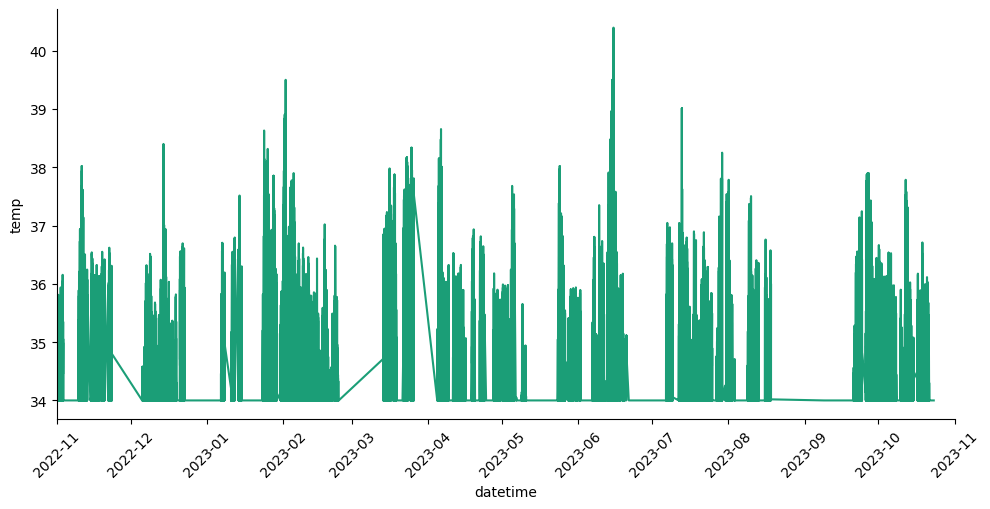

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Convert datetime column to datetime objects
df_sorted['datetime'] = pd.to_datetime(df_sorted['datetime'])

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['datetime']
    ys = series['temp']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2))
df_sorted = data.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
plt.ylabel('temp')

# Set x-axis range and format
start_date = pd.to_datetime('2022-11-01')
end_date = pd.to_datetime('2023-11-01')
ax.set_xlim(start_date, end_date)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


**Plotting temperature values over timeperiod (datetime), by setting threshold as Tf and Ti and above threshold considered as Clinical CRS event**

**Tf-38c(red line ) and Ti-37.2 (blue line) and black diamond as Clinical CRS event**    

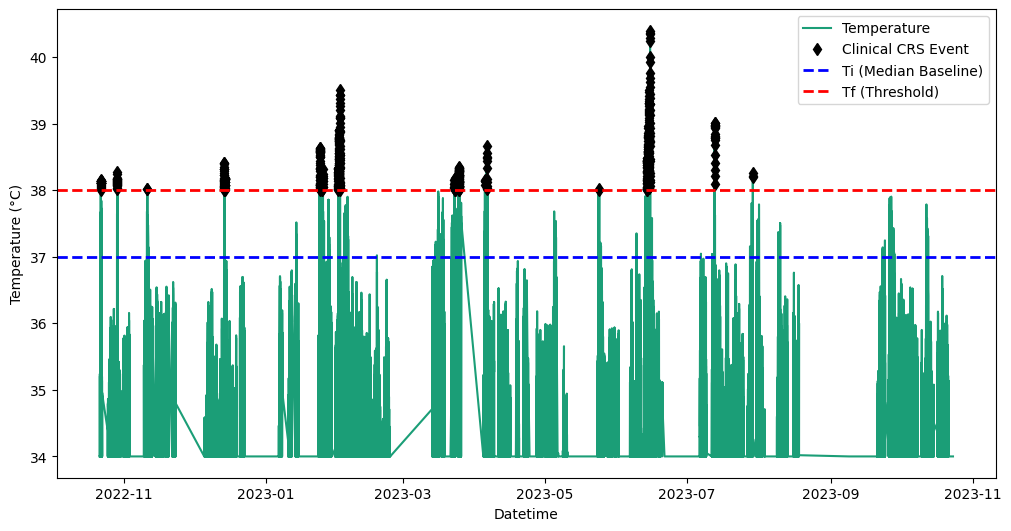

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, ti_value, tf_threshold, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['datetime']
    ys = series['temp']

    # Plot temperature data
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

    # Mark Clinical CRS events with black diamonds
    crs_events = series[series['temp'] > tf_threshold]
    plt.plot(crs_events['datetime'], crs_events['temp'], 'kd', label='Clinical CRS Event')

    # Plot Ti as a solid line
    plt.axhline(y=ti_value, color='blue', linestyle='--', linewidth=2, label='Ti (Median Baseline)')

    # Plot Tf as a dotted line
    plt.axhline(y=tf_threshold, color='red', linestyle='--', linewidth=2, label='Tf (Threshold)')

# Set threshold temperatures
threshold_ti = 37.0  # Example value for Ti
threshold_tf = 38.0  # Example value for Tf

# Plot temperature data
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)
df_sorted = data.sort_values('datetime', ascending=True)
_plot_series(df_sorted, 'Temperature', threshold_ti, threshold_tf)

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.legend()

# Show plot
plt.show()


**Plotting Clinical CRS event (black diamond) at starting point where temperature is above threshold method.**

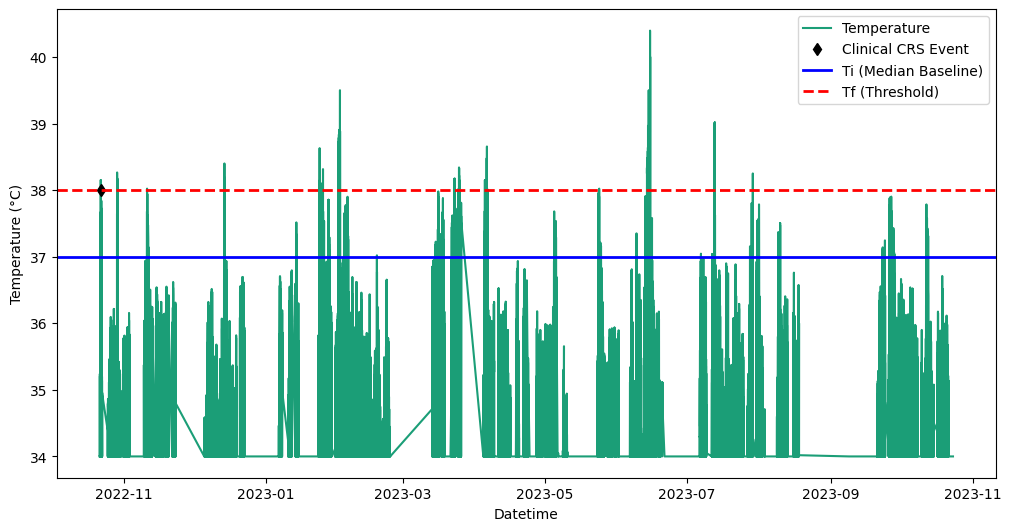

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, ti_value, tf_threshold, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['datetime']
    ys = series['temp']

    # Plot temperature data
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

    # Find the first occurrence of temperature exceeding the threshold
    crs_events = series[series['temp'] > tf_threshold].head(1)

    # Plot the first occurrence of Clinical CRS event with a black diamond
    if not crs_events.empty:
        plt.plot(crs_events['datetime'], crs_events['temp'], 'kd', label='Clinical CRS Event')

    # Plot Ti as a solid line
    plt.axhline(y=ti_value, color='blue', linestyle='-', linewidth=2, label='Ti (Median Baseline)')

    # Plot Tf as a dotted line
    plt.axhline(y=tf_threshold, color='red', linestyle='--', linewidth=2, label='Tf (Threshold)')

# Set threshold temperatures
threshold_ti = 37.0  # Example value for Ti
threshold_tf = 38.0  # Example value for Tf

# Plot temperature data
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)
df_sorted = data.sort_values('datetime', ascending=True)
_plot_series(df_sorted, 'Temperature', threshold_ti, threshold_tf)

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.legend()

# Show plot
plt.show()


**Converting timeperiod (datetime)  into hours at which vital signs are measured.**

In [ ]:
# Convert datetime column to datetime data type
data['datetime'] = pd.to_datetime(data['datetime'])

# Extract the hour component and represent it in hours
data['hours'] = data['datetime'].dt.hour

# Display the result
print(data['hours'])


11449      4
13878     21
13877     21
13876     21
13875     21
          ..
154395    12
154396    12
154397    12
154388    12
154804    19
Name: hours, Length: 245355, dtype: int32


In [ ]:
data

,patient_id,datetime,temp,Tf_CRS,Ti_CRS,Monitoring_Time_Hours,hours
11449,WEAR_7001,2022-10-25 04:00:00,34.463562,0,0,214.0,4
13878,WEAR_7001,2022-10-26 21:00:00,34.000000,0,0,214.0,21
13877,WEAR_7001,2022-10-26 21:00:00,34.000000,0,0,214.0,21
13876,WEAR_7001,2022-10-26 21:00:00,34.000000,0,0,214.0,21
13875,WEAR_7001,2022-10-26 21:00:00,34.000000,0,0,214.0,21
...,...,...,...,...,...,...,...
154395,WEAR_7029,2023-10-14 12:00:00,34.688562,0,0,288.0,12
154396,WEAR_7029,2023-10-14 12:00:00,34.000000,0,0,288.0,12
154397,WEAR_7029,2023-10-14 12:00:00,34.693562,0,0,288.0,12
154388,WEAR_7029,2023-10-14 12:00:00,34.000000,0,0,288.0,12


**defining features as temperature values and timeperiod in hours and target variable as Ti_CRS(0,1)**

In [ ]:
# Define features and target variables
features = ["temp","hours"]

target = "Ti_CRS"

# Drop rows with missing target values
data.dropna(subset=target, inplace=True)

Data Splitting as done with unique Patient id by Training(70),Validation(20) and testing(10)

In [ ]:
from sklearn.model_selection import train_test_split

# Split unique patient IDs into train and test sets
PT_IDs_train_val, PT_IDs_test = train_test_split(data['patient_id'].unique(), test_size=0.1, random_state=42)
PT_IDs_train, PT_IDs_val = train_test_split(PT_IDs_train_val, test_size=0.222, random_state=42)  # 0.222 = 20% / (70% + 20%)

# Filter data based on patient IDs
train_data = data[data['patient_id'].isin(PT_IDs_train)]
val_data = data[data['patient_id'].isin(PT_IDs_val)]
test_data = data[data['patient_id'].isin(PT_IDs_test)]

# Ensure patient IDs are mutually exclusive
assert len(set(train_data['patient_id']).intersection(set(val_data['patient_id']))) == 0
assert len(set(train_data['patient_id']).intersection(set(test_data['patient_id']))) == 0
assert len(set(val_data['patient_id']).intersection(set(test_data['patient_id']))) == 0


In [ ]:
print("Training Data Samples:", len(train_data))
print("Validation Data Samples:", len(val_data))
print("Testing Data Samples:", len(test_data))


Training Data Samples: 173625
Validation Data Samples: 39083
Testing Data Samples: 32647


**Installing required libraries to train the LSTM (timeseries model) : keras and Tensorflow**

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

**This code trains an LSTM neural network model for binary classification tasks using TensorFlow and scikit-learn libraries.**

1.**Import Libraries:**

NumPy: For numerical operations.
Pandas: For data manipulation.
scikit-learn's train_test_split: Function for splitting the dataset.
StandardScaler: For feature normalization.
Sequential: Model for stacking layers.
LSTM, Dense: Layers for building the neural network.
EarlyStopping: Callback for preventing overfitting.
mean_squared_error, accuracy_score: Metrics for evaluating model performance.
random: For setting seed for reproducibility.
TensorFlow: For deep learning.

**Set seed for reproducibility :**

Setting the seed value to 42 ensures reproducibility in random number generation for libraries like NumPy, TensorFlow, and random.

2. **Data Preparation:**

The dataset is converted into numpy arrays (X for features and y for the target variable).
Features are normalized using StandardScaler.

3. **Train-Test Split:**

The dataset is split into training(70%), testing(10%), and validation(20%) sets using train_test_split.

4.**Model Definition:**

An LSTM model is defined with one LSTM layer containing 50 units, followed by a Dense layer with a sigmoid activation function for binary classification.

5. **Model Compilation:**

The model is compiled using the Adam optimizer and binary cross-entropy loss function. Accuracy is used as an additional metric for monitoring model performance.

5.**Early Stopping:**

EarlyStopping is implemented to monitor validation loss and stop training if it doesn't improve for 5 consecutive epochs.

6.**Model Training:**

The model is trained on the training data with early stopping.

7. **Model Evaluation:**

The trained model is evaluated on the testing data, and both mean squared error and accuracy are calculated


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, accuracy_score
import random
import tensorflow as tf

# Set seed for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Convert DataFrame to numpy array
X_train = train_data[features].values
y_train = train_data[target].values

X_val = val_data[features].values
y_val = val_data[target].values

X_test = test_data[features].values
y_test = test_data[target].values

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM input (assuming a time step of 1)
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_lstm = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model without regularization and with Dropout layer
model = Sequential([
    LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(units=1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model with early stopping
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_val_lstm, y_val), callbacks=[early_stopping])

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test_lstm, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/50
5426/5426 [==============================] - 26s 4ms/step - loss: 0.0031 - accuracy: 0.9969 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 2/50
5426/5426 [==============================] - 19s 4ms/step - loss: 0.0022 - accuracy: 0.9984 - val_loss: 0.0017 - val_accuracy: 0.9997
Epoch 3/50
5426/5426 [==============================] - 19s 3ms/step - loss: 0.0019 - accuracy: 0.9987 - val_loss: 0.0015 - val_accuracy: 0.9992
Epoch 4/50
5426/5426 [==============================] - 27s 5ms/step - loss: 0.0018 - accuracy: 0.9990 - val_loss: 0.0015 - val_accuracy: 0.9990
Epoch 5/50
5426/5426 [==============================] - 35s 6ms/step - loss: 0.0017 - accuracy: 0.9991 - val_loss: 0.0014 - val_accuracy: 0.9993
Epoch 6/50
5426/5426 [==============================] - 33s 6ms/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 0.0013 - val_accuracy: 0.9997
Epoch 7/50
5426/5426 [==============================] - 27s 5ms/step - loss: 0.0015 - accuracy: 0.9993 - val_loss: 0.0013 - val_ac

In [ ]:
# Evaluate model
y_pred = model.predict(X_test_lstm)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


1021/1021 [==============================] - 2s 2ms/step
Mean Squared Error: 0.0033672575308179515


k-fold Cross valiadtion

In [ ]:

from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed_value)

# Define lists to store evaluation metrics for each fold
test_losses = []
test_accuracies = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X_train_lstm):
    X_train_fold, X_val_fold = X_train_lstm[train_index], X_train_lstm[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Build LSTM model
    model = Sequential([
        LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dense(units=1)
    ])

    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train model with early stopping
    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(X_test_lstm, y_test)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

# Calculate average evaluation metrics across all folds
avg_test_loss = np.mean(test_losses)
avg_test_accuracy = np.mean(test_accuracies)

print("Average Test Loss:", avg_test_loss)
print("Average Test Accuracy:", avg_test_accuracy)

Epoch 1/50
4341/4341 [==============================] - 17s 4ms/step - loss: 0.0033 - accuracy: 0.9969 - val_loss: 0.0024 - val_accuracy: 0.9991
Epoch 2/50
4341/4341 [==============================] - 16s 4ms/step - loss: 0.0022 - accuracy: 0.9984 - val_loss: 0.0021 - val_accuracy: 0.9986
Epoch 3/50
4341/4341 [==============================] - 15s 3ms/step - loss: 0.0020 - accuracy: 0.9987 - val_loss: 0.0019 - val_accuracy: 0.9990
Epoch 4/50
4341/4341 [==============================] - 16s 4ms/step - loss: 0.0019 - accuracy: 0.9988 - val_loss: 0.0018 - val_accuracy: 0.9986
Epoch 5/50
4341/4341 [==============================] - 19s 4ms/step - loss: 0.0018 - accuracy: 0.9989 - val_loss: 0.0017 - val_accuracy: 0.9990
Epoch 6/50
4341/4341 [==============================] - 15s 4ms/step - loss: 0.0017 - accuracy: 0.9991 - val_loss: 0.0017 - val_accuracy: 0.9997
Epoch 7/50
4341/4341 [==============================] - 16s 4ms/step - loss: 0.0016 - accuracy: 0.9992 - val_loss: 0.0016 - val_ac

Optimal threshold method

AUC ROC score method

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for test set
y_pred_prob = model.predict(X_test_lstm)

# Compute ROC curve and AUC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Find optimal threshold based on ROC curve (You can choose different strategies here)
optimal_idx_roc = np.argmax(tpr - fpr)
optimal_threshold_roc = thresholds_roc[optimal_idx_roc]

print("Optimal Threshold by ROC Curve Method:", optimal_threshold_roc)
print("AUC-ROC:", roc_auc)

1021/1021 [==============================] - 4s 3ms/step
Optimal Threshold by ROC Curve Method: 0.43239912
AUC-ROC: 0.9999676573738004


Maximum f1 score method

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

# Find optimal threshold based on Precision-Recall curve (You can choose different strategies here)
fscore = (2 * precision * recall) / (precision + recall + 1e-8)
optimal_idx_pr = np.argmax(fscore)
optimal_threshold_pr = thresholds_pr[optimal_idx_pr]

print("Optimal Threshold by Precision-Recall Method:", optimal_threshold_pr)
print("Best F1 Score:", fscore[optimal_idx_pr])

Optimal Threshold by Precision-Recall Method: 0.4827049
Best F1 Score: 0.9818763276228798


In [ ]:
# Directly find the threshold that maximizes F1 score
optimal_idx_f1 = np.argmax(fscore)
optimal_threshold_f1 = thresholds_pr[optimal_idx_f1]

print("Optimal Threshold by F1 Score Method:", optimal_threshold_f1)
print("Best F1 Score:", fscore[optimal_idx_f1])

Optimal Threshold by F1 Score Method: 0.4827049
Best F1 Score: 0.9818763276228798


Defing threshold and evaluating Classification metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Convert probabilities to binary predictions based on a threshold
threshold = 0.43
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9985603577664104
Precision: 0.9519427402862985
Recall: 1.0
F1 Score: 0.9753797799895233
Confusion Matrix:
 [[31669    47]
 [    0   931]]


**Early CRS detection time:**

This code predicts the probability of Cytokine Release Syndrome (CRS) onset using an LSTM model. It then defines a threshold probability to detect CRS onset. If the predicted probability exceeds the threshold, CRS onset is detected, and the time of onset is calculated. Finally, if CRS onset is detected, the time difference between the actual CRS onset and the detected onset is computed as the early detection time.

In [ ]:

# Predict CRS probability using the LSTM model
crs_probabilities = model.predict(X_test_lstm)

# Define a threshold probability
threshold = 0.48

# Detect CRS onset
crs_onset_detected = False
crs_onset_time = None
for idx, prob in enumerate(crs_probabilities):
    if prob > threshold:
        crs_onset_detected = True
        crs_onset_time = data.iloc[idx]['hours']
        break

# Calculate early detection time if CRS onset is detected
if crs_onset_detected:
    actual_crs_onset_time = data[data['Ti_CRS'] == 1]['hours'].iloc[0]
    early_detection_time = crs_onset_time - actual_crs_onset_time
    print("Early CRS detection time:", early_detection_time)
else:
    print("CRS onset not detected.")


1021/1021 [==============================] - 2s 2ms/step
Early CRS detection time: -7


**Plotting Model Training loss vs Validation loss to check overfitting**

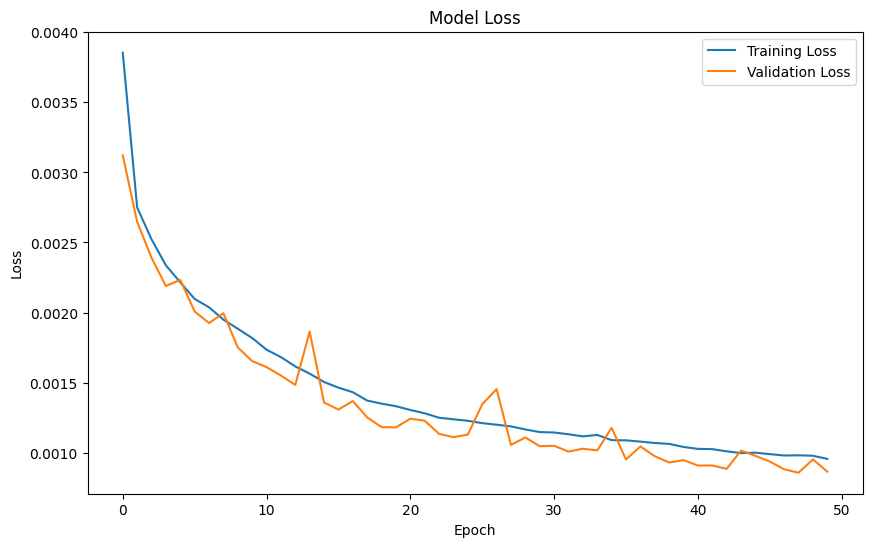

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


